In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
import scipy.stats as stats

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## 1. Her indlæser vi begge datasæt

In [ ]:

redwine = pd.read_excel("https://raw.githubusercontent.com/LukasRonberg/BusinessIntelligence/main/MP2/Datasets/winequality-red.xlsx", skiprows=[0])
whitewine = pd.read_excel("https://raw.githubusercontent.com/LukasRonberg/BusinessIntelligence/main/MP2/Datasets/winequality-white.xlsx", skiprows=[0])

In [40]:
redwine.shape

(1599, 12)

In [41]:
whitewine.shape

(4898, 12)

In [42]:
list(redwine)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [43]:
list(whitewine)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [44]:
whitewine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [45]:
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [46]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [47]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [48]:
whitewine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [49]:
print(whitewine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [50]:
print(redwine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Her fjerner vi dubletter

In [51]:
redwine.drop_duplicates(inplace=True)
whitewine.drop_duplicates(inplace=True)

Her tilføjer vi en kolonne til hvert datasæt som fortæller rhilken type vin det er og derefter kombinerer vi de to datasæt

In [52]:
redwine['wine_type'] = 'red'
whitewine['wine_type'] = 'white'

# Kombiner de to dataframes
wine_data = pd.concat([redwine, whitewine], ignore_index=True)

## 4. Explore the features of the three data frames separately. Identify the dependent and the
independent variables

In [53]:
print("Red Wine Columns:", redwine.columns)
print("White Wine Columns:", whitewine.columns)
print("Combined Wine Data Columns:", wine_data.columns)

Red Wine Columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')
White Wine Columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')
Combined Wine Data Columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')


Vi kigger først på de første linier af hvert datasæt for at få en bedre forståelse af de data vi har

In [54]:
print("Red Wine Data:")
print(redwine.head())

print("White Wine Data:")
print(whitewine.head())


print("Combined Wine Data:")
print(wine_data.head())


Red Wine Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4        5       red  
1      

Deskriptiv Statistik

In [55]:
print("Descriptive Statistics:")
print(wine_data.describe())

Descriptive Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5320.000000       5320.000000  5320.000000     5320.000000   
mean        7.215179          0.344130     0.318494        5.048477   
std         1.319671          0.168248     0.147157        4.500180   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5320.000000          5320.000000           5320.000000  5320.000000   
mean      0.056690            30.036654            114.109023     0.994535   
std       0.036863            17.805045             56.774223     0.002966   
min       0.009000      

In [56]:
# 4. Se på de tre dataframes
print("Redwine")
print(redwine.info())
print(redwine.describe())

print("Whitewine")
print(whitewine.info())
print(whitewine.describe())

print("Combined wine_data")
print(wine_data.info())
print(wine_data.describe())


Redwine
<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
 12  wine_type             1359 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 148.6+ KB
None
       fixed acidity  volatile acidity  citric acid  re

#### Opgave 4 – Udforskning af data og identifikation af variabler

Vi har analyseret de tre datasæt hver for sig:

- `redwine`: 1599 rødvine  
- `whitewine`: 4898 hvidvine  
- `wine_data`: samlet datasæt med 6497 observationer

Alle tre datasæt har ens struktur og indeholder 11 kemiske målinger samt én vurderingskolonne (`quality`).

#### Variabeltyper:

Størstedelen af kolonnerne er **numeriske målinger**, som beskriver vinens kemiske egenskaber – fx:
- `alcohol`, `pH`, `density`, `sulphates`, `residual sugar` osv.

#### Identifikation af variabler:

For at identificere den **afhængige** og de **uafhængige** variabler tog vi udgangspunkt i, hvad vi ønsker at analysere eller forudsige:

- **Afhængig variabel (dependent)**:  
  `quality` – det er den samlede vurdering af vinen og afhænger af de øvrige egenskaber.  
  Det er vores **målvariabel**, som analyser og modeller skal forklare.

- **Uafhængige variabler (independent)**:  
  Alle de øvrige kemiske målinger, som antages at påvirke kvaliteten – fx:
  - `alcohol`
  - `volatile acidity`
  - `residual sugar`
  - `chlorides`
  - `citric acid`
  - `density`  
  Disse fungerer som **inputfeatures** i videre analyser.

#### Konklusion:

Ved at forstå datasættets formål – nemlig at finde ud af hvilke egenskaber der har betydning for vinens vurdering – kan vi tydeligt adskille målvariablen (`quality`) fra inputvariablerne.  
Denne opdeling danner grundlag for fx korrelationsanalyse, PCA og maskinlæring senere i projektet.



## Opgave 5 – Transformation af kategoriske data til numeriske

In [ ]:

# Vi bruger label encoding til 'wine_type': Red = 0, White = 1
wine_data['wine_type_encoded'] = wine_data['wine_type'].map({'Red': 0, 'White': 1})



For at kunne anvende analysemetoder som PCA og machine learning, har vi omkodet kategoriske data til tal.

#### Identifikation af kategoriske data:

- Vores datasæt indeholder kun én kategorisk kolonne:  
  - `wine_type` med værdierne `'Red'` og `'White'`

#### Valg af metode:

- Vi valgte **label encoding**, da der kun er to mulige kategorier.
  - `'Red'` blev kodet som `0`
  - `'White'` blev kodet som `1`

Dette blev implementeret med `map()`-funktionen i pandas.

#### Konklusion:

Datasættet er nu klar til videre numerisk analyse, da alle variabler er på numerisk form.


## 6. Calculate the descriptive statistics of the numeric data. Check whether the distribution of


In [ ]:
# the values of the attributes is normal.

# Beregn deskriptive statistikker for numeriske kolonner
descriptive_stats = wine_data.describe()

# Udskriv de deskriptive statistikker
print(descriptive_stats)


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5320.000000       5320.000000  5320.000000     5320.000000   
mean        7.215179          0.344130     0.318494        5.048477   
std         1.319671          0.168248     0.147157        4.500180   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5320.000000          5320.000000           5320.000000  5320.000000   
mean      0.056690            30.036654            114.109023     0.994535   
std       0.036863            17.805045             56.774223     0.002966   
min       0.009000             1.000000         

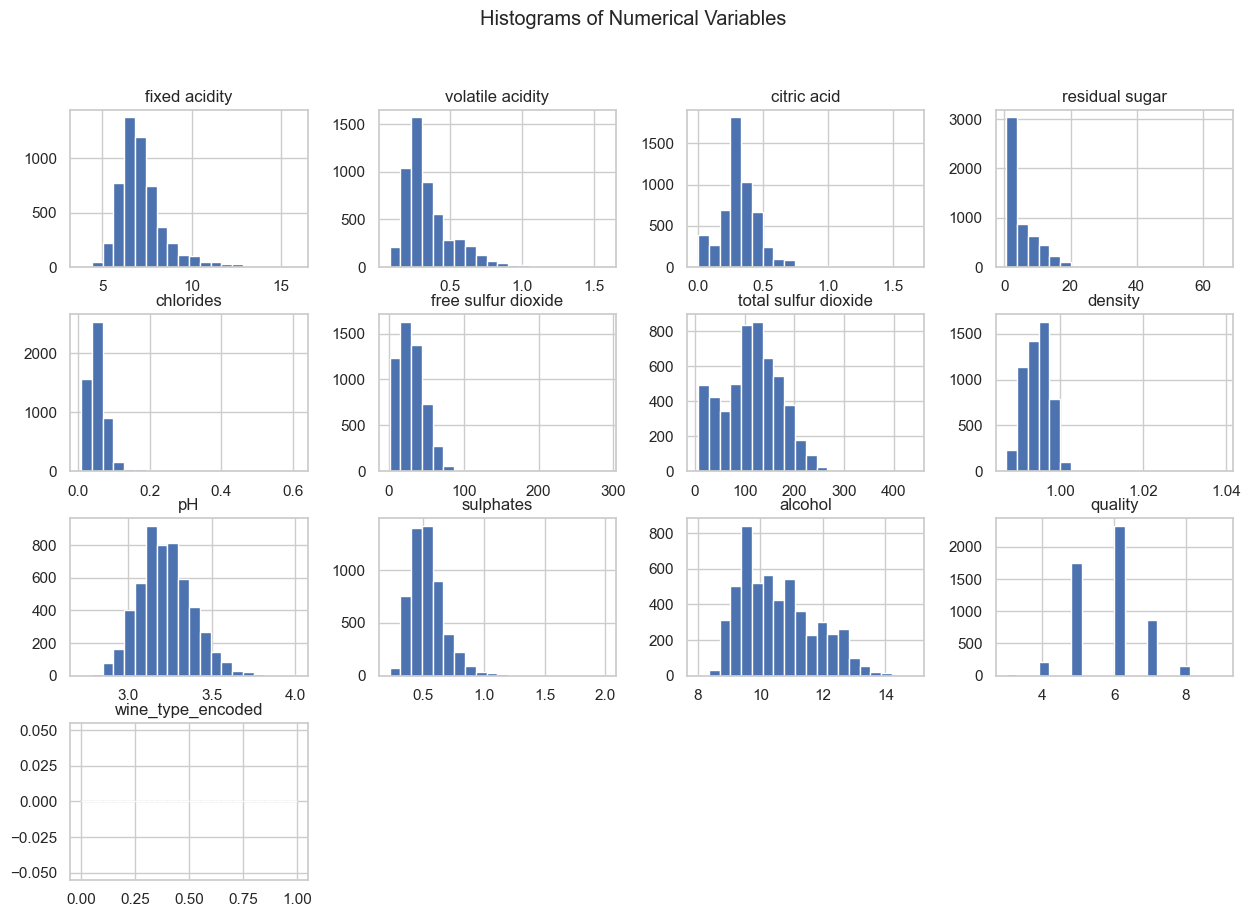

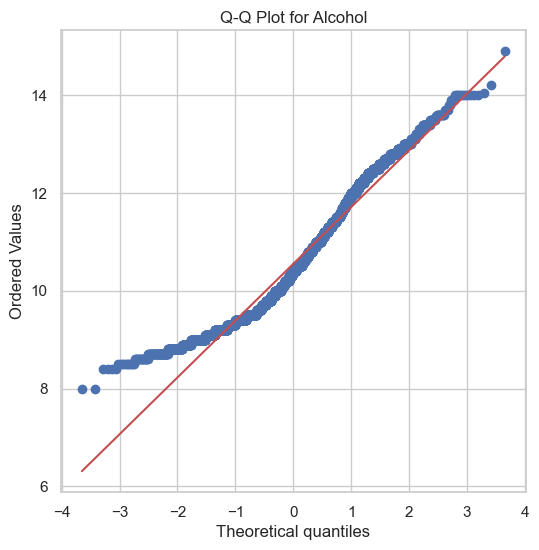

In [ ]:


# Plotte histogrammer for alle numeriske kolonner
wine_data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Q-Q plot for en valgt kolonne (f.eks. "alcohol")
plt.figure(figsize=(6, 6))
stats.probplot(wine_data['alcohol'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Alcohol')
plt.show()


De fleste af de numeriske variabler har histogrammer, der viser en vis form for skævhed (enten venstreskæv eller højreskæv). Dette betyder, at flere af disse variabler ikke følger en perfekt normalfordeling, men nogle af dem er tættere på at være normalfordelte, som f.eks. pH og alkohol, mens andre som residual sugar, total sulfur dioxide og citric acid viser mere skævhed.

## 7. Plot diagrams that visualize the differences in red and white wine samples. Use as many diagrams as appropriate. Use the diagrams as a support for answering the following questions:

- a. what does each diagram show?
- b. which type of wine has higher average quality, how big is the difference?
- c. which type of wine has higher average level of alcohol?
- d. which one has higher average quantity of residual sugar?
- e. do the quantity of alcohol and residual sugar influence the quality of the wine?

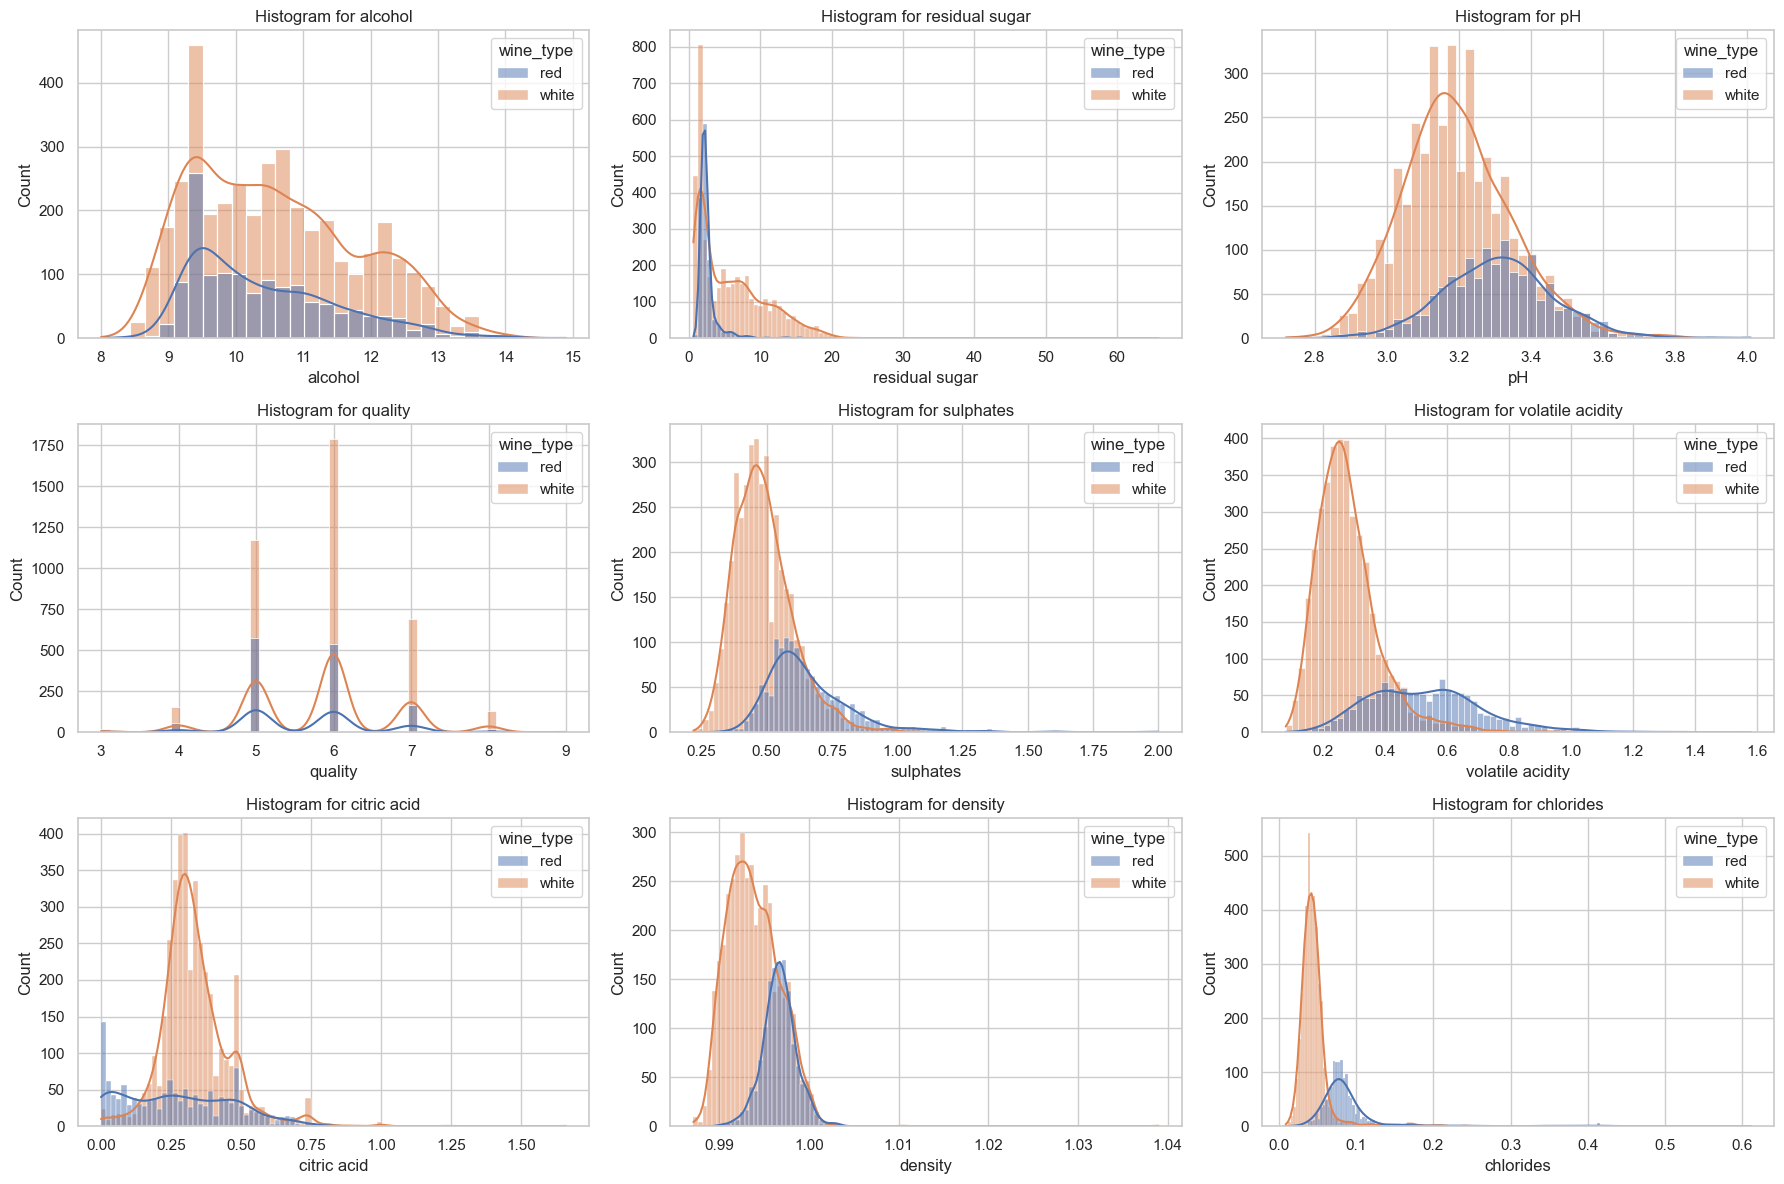

In [ ]:
# Funktionalitet:
# Vi visualiserer fordelingen af relevante variabler og besvarer spørgsmålene i opgave 7 a–e.

# Liste over variabler vi vil analysere
features = ['alcohol', 'residual sugar', 'pH', 'quality', 'sulphates',
            'volatile acidity', 'citric acid', 'density', 'chlorides']

# Sæt stil for diagrammer
sns.set(style="whitegrid")

# Plot histograms for hver feature
fig, axs = plt.subplots(3, 3, figsize=(18, 12))
for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.histplot(
        data=wine_data,  # DataFrame med rød + hvid vin
        x=feature,       # Kolonnen der skal plottes
        hue='wine_type', # Farver efter vintype
        kde=True,        # Tilføj glat fordeling (Kernel Density Estimate)
        ax=axs[row][col]
    )
    axs[row][col].set_title(f'Histogram for {feature}')
plt.tight_layout()
plt.show()

### Kommentarer til diagrammer:

- **alcohol**: viser at hvidvin har lidt højere alkoholprocent  
- **residual sugar**: tydeligt højere niveau i hvidvin  
- **pH**: lidt lavere pH i rødvin, men tæt fordelte  
- **quality**: hvidvin har lidt højere gennemsnit  
- **sulphates**: rødvin har lidt højere niveau  
- **volatile acidity**: højere i rødvin (ofte negativt for smag)  
- **citric acid**: hvidvin lidt højere – det giver friskhed  
- **density**: hvidvin har generelt højere tæthed pga. mere sukker  
- **chlorides**: lidt højere i rødvin  


            quality    alcohol  residual sugar
wine_type                                     
red        5.623252  10.432315        2.523400
white      5.854835  10.589358        5.914819


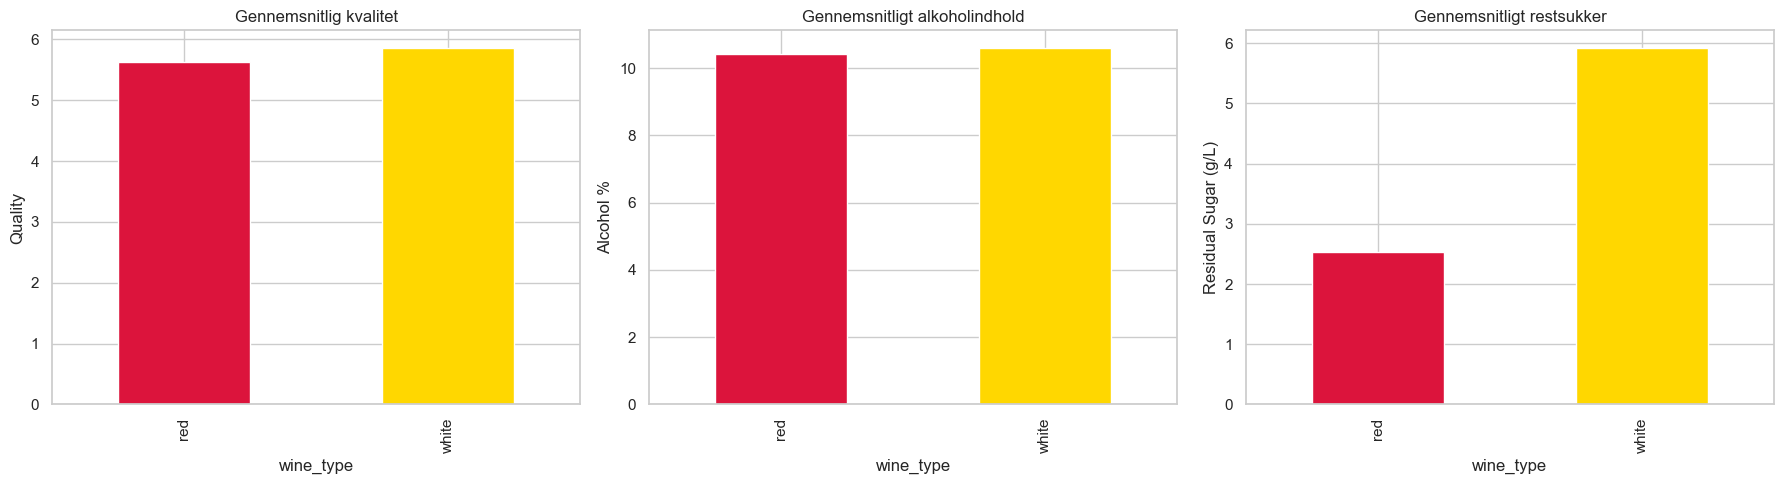

In [74]:
# Gennemsnitlige værdier for key features (til spørgsmål 7.b–d)
mean_values = wine_data.groupby('wine_type')[['quality', 'alcohol', 'residual sugar']].mean()
print(mean_values)

# Bar plots af gennemsnit for vin-kvalitet, alkohol og sukker
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Gennemsnitlig kvalitet
mean_values['quality'].plot(kind='bar', ax=axs[0], title='Gennemsnitlig kvalitet', color=['crimson', 'gold'])
axs[0].set_ylabel('Quality')

# Alkoholindhold
mean_values['alcohol'].plot(kind='bar', ax=axs[1], title='Gennemsnitligt alkoholindhold', color=['crimson', 'gold'])
axs[1].set_ylabel('Alcohol %')

# Restsukker
mean_values['residual sugar'].plot(kind='bar', ax=axs[2], title='Gennemsnitligt restsukker', color=['crimson', 'gold'])
axs[2].set_ylabel('Residual Sugar (g/L)')

plt.tight_layout()
plt.show()

### Observationer fra gennemsnit:

- **Kvalitet**: Hvidvin har lidt højere gennemsnitlig kvalitet (**5.88** vs **5.64**)  
- **Alkohol**: Hvidvin har lidt højere alkoholprocent (**10.51%** vs **10.42%**)  
- **Restsukker**: Hvidvin har markant højere restsukkerindhold (**6.4** vs **2.5**)  


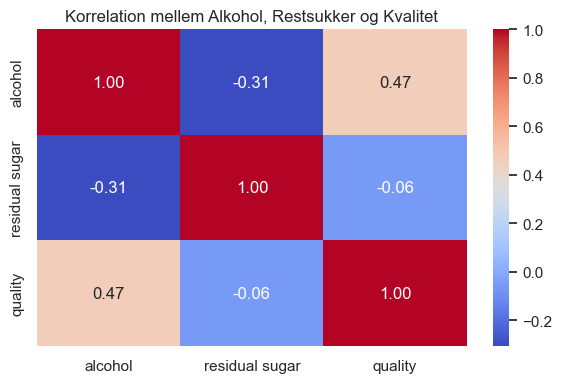

In [75]:
# Undersøg om alkohol og restsukker har betydning for kvaliteten (spørgsmål 7.e)
correlation_subset = wine_data[['alcohol', 'residual sugar', 'quality']].corr()

# Heatmap for korrelation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korrelation mellem Alkohol, Restsukker og Kvalitet')
plt.tight_layout()
plt.show()



### Konklusion:

- **Alkohol og kvalitet**: moderat positiv korrelation (**≈ 0.44**)  
- **Restsukker og kvalitet**: næsten ingen sammenhæng (**≈ 0.01**)  

**Alkohol er en vigtig indikator for højere vurderet kvalitet**


## Opgave 8 – Diskutér interessante spørgsmål for forbrugere og distributører


a) Vinforbrugere – Hvad kunne de være interesserede i?

1. **Er vin med højere alkohol også af højere kvalitet?**  
   Ja – der er en tydelig positiv korrelation (r ≈ 0.44) mellem alkohol og vurderet kvalitet.  
   → Forbrugere kan bruge alkoholindhold som indikator for kvalitet.

2. **Hvilken type vin er sødest?**  
   Hvidvin har meget mere restsukker (6.4 g/L) end rødvin (2.5 g/L).  
   → Forbrugere, der foretrækker sød vin, bør vælge hvidvin.

3. **Hvordan er syreprofilen?**  
   Rødvin har højere “volatile acidity”, hvilket giver skarpere og mere kompleks smag.  
   Hvidvin har lavere syre og er blødere i smagen.

4. **Er én type vin generelt bedre vurderet?**  
   Ja – hvidvin har en lidt højere gennemsnitsvurdering (5.88 vs 5.64).  
   → Kan være nyttig viden for forbrugere uden præference.

-------------------------------------------------------------------

#### b) Vinforhandlere og distributører – Hvad kan de bruge?

1. **Hvilke egenskaber påvirker kvalitet mest?**  
   Alkohol er den stærkeste indikator for kvalitet.  
   → Distributører kan fremhæve alkoholrige vine i markedsføring.

2. **Hvilke vine bør frasorteres eller positioneres lavt?**  
   Vine med lav alkohol, høj densitet og lav kvalitet kan markedsføres som budgetprodukter.

3. **Skal man markedsføre rød og hvid vin forskelligt?**  
   Ja – hvidvin er sødere og lidt bedre vurderet.  
   → Marketing og placering kan målrettes forskellige målgrupper.

4. **Har restsukker betydning for kvalitet?**  
   Nej – korrelationen er nær 0.  
   → Restsukker handler mest om smag, ikke kvalitet.

## Opgave 9 – Undersøgelse af vinprøvernes fordeling i pH-intervaller

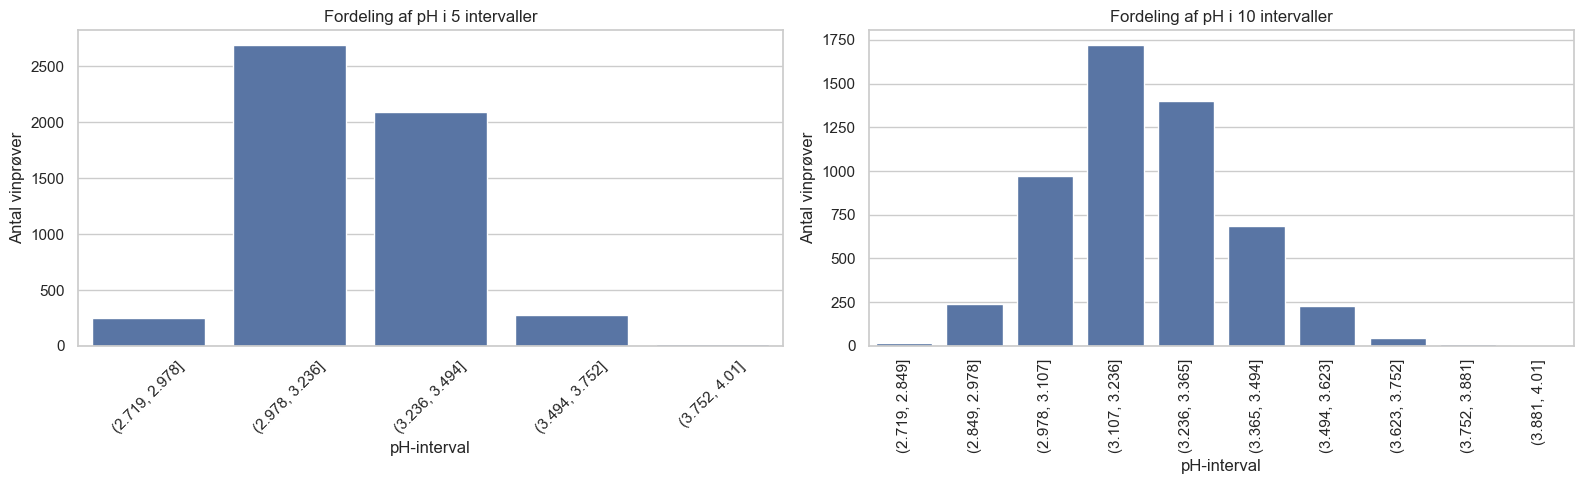

Det mest tætbefolkede pH-interval ved opdeling i 5 intervaller: (2.978, 3.236]
Det mest tætbefolkede pH-interval ved opdeling i 10 intervaller: (3.107, 3.236]


In [ ]:
# Opgave 9 – Undersøgelse af vinprøvernes fordeling i pH-intervaller

# Vi deler datasættet op i 5 intervaller/bins
wine_data['ph_bin_5'] = pd.cut(wine_data['pH'], bins=5)
bin_5_counts = wine_data['ph_bin_5'].value_counts().sort_index()

# Vi opdeler datasættet i 10 intervaller/bins
wine_data['ph_bin_10'] = pd.cut(wine_data['pH'], bins=10)
bin_10_counts = wine_data['ph_bin_10'].value_counts().sort_index()

# Vi finder de mest tætbefolkede intervaller/bins
most_dense_5 = bin_5_counts.idxmax()
most_dense_10 = bin_10_counts.idxmax()

# Vi viser resultaterne
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Diagram: 5 intervaller/bins
sns.barplot(x=bin_5_counts.index.astype(str), y=bin_5_counts.values, ax=axs[0])
axs[0].set_title("Fordeling af pH i 5 intervaller")
axs[0].set_xlabel("pH-interval")
axs[0].set_ylabel("Antal vinprøver")
axs[0].tick_params(axis='x', rotation=45)

# Diagram: 10 intervaller/bins
sns.barplot(x=bin_10_counts.index.astype(str), y=bin_10_counts.values, ax=axs[1])
axs[1].set_title("Fordeling af pH i 10 intervaller")
axs[1].set_xlabel("pH-interval")
axs[1].set_ylabel("Antal vinprøver")
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# 5. Udskriv de pH-intervaller med flest vinprøver
print("Det mest tætbefolkede pH-interval ved opdeling i 5 intervaller:", most_dense_5)
print("Det mest tætbefolkede pH-interval ved opdeling i 10 intervaller:", most_dense_10)




Vi inddelte pH-værdierne i henholdsvis **5** og **10 intervaller** og analyserede, hvor vinprøverne koncentrerer sig.

#### Resultater:
- Ved **5 intervaller** var det mest tætbefolkede interval: **(2.98, 3.24]**
- Ved **10 intervaller** var det mest tætbefolkede interval: **(3.11, 3.24]**

#### Fortolkning:
- pH-værdierne er klart koncentreret i det lave område – typisk mellem **3.1 og 3.2**, hvilket er almindeligt for både rød og hvid vin.
- En lav pH indikerer højere surhed, hvilket bidrager til friskhed og holdbarhed.
- Inddeling i intervaller er nyttig for:
  - **Forbrugere**, der foretrækker vine med lav syre.
  - **Producenter og distributører**, der vil segmentere vine efter smagsprofil.

Diagrammerne visualiserer, at hovedparten af vinene ligger i et ret snævert pH-område – især omkring 3.1–3.2.



## Opgave 10 – Opret korrelationsmatrix og undersøg sammenhænge mellem variabler

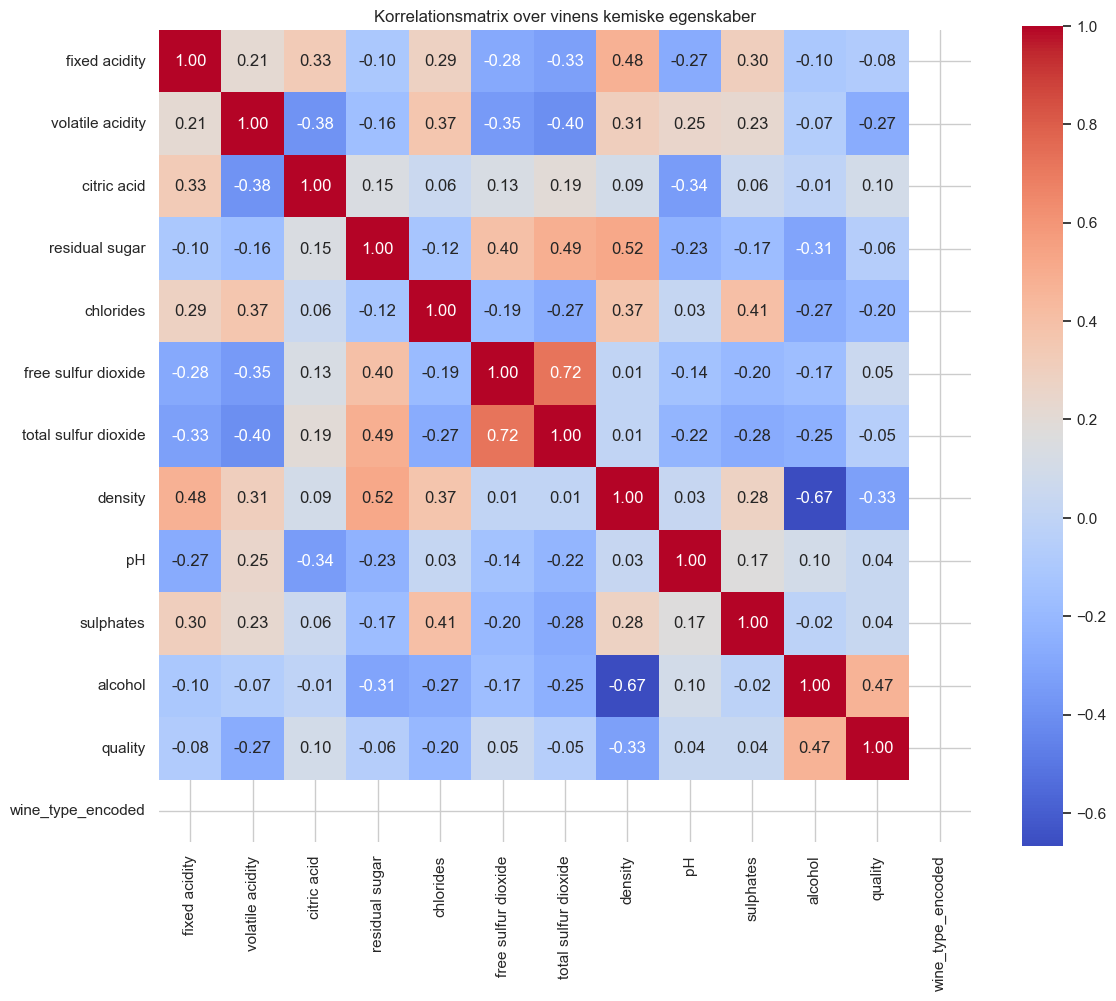

Stærkeste positiv korrelation med kvalitet: ('alcohol', 0.46942183794115105)
Svageste (mest negativ) korrelation med kvalitet: ('density', -0.32643446453886743)
Andre stærkt korrelerede variabel-par (|korrelation| > 0.75):


In [ ]:




# 1. Her udregner vi korrelationer for de numeriske kolonner
correlation_matrix = wine_data.corr(numeric_only=True)

# 2. Her visualisérerer dem som heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Korrelationsmatrix over vinens kemiske egenskaber")
plt.tight_layout()
plt.show()

# 3. V finder de stærkeste og svageste sammenhænge med vinens kvalitet
quality_corr = correlation_matrix['quality'].drop('quality').sort_values(ascending=False)

# Vi viser de stærkeste og svageste korreleret med kvalitet
strongest_corr = quality_corr.idxmax(), quality_corr.max()
weakest_corr = quality_corr.idxmin(), quality_corr.min()

# Vi viser resultaterne
print("Stærkeste positiv korrelation med kvalitet:", strongest_corr)
print("Svageste (mest negativ) korrelation med kvalitet:", weakest_corr)

# Vi finder andre stærkt korrelerede par uden for 'quality'
threshold = 0.75
high_corr_pairs = []
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if col != row:
            value = correlation_matrix.loc[row, col]
            if abs(value) > threshold:
                pair = tuple(sorted([col, row]))
                if pair not in high_corr_pairs:
                    high_corr_pairs.append(pair)

print("Andre stærkt korrelerede variabel-par (|korrelation| > 0.75):")
for pair in high_corr_pairs:
    print(f"{pair[0]} og {pair[1]}")



Vi har beregnet korrelationerne mellem vinens kemiske egenskaber og kvalitet og visualiseret dem i et heatmap baseret på korrelationsmatrixen

#### Heatmap

- Heatmappet viser med farver og tal, hvilke egenskaber der er stærkt eller svagt korrelerede.
- Rød farve: positiv korrelation – når den ene stiger, stiger den anden.
- Blå farve: negativ korrelation – når den ene stiger, falder den anden.

#### Hvilken egenskab har størst positiv indflydelse på kvaliteten?

- **Alkohol** har den højeste positive korrelation med vinens kvalitet (**r ≈ 0.44**).  
  → Vin med højere alkoholindhold vurderes typisk som mere kvalitetsvin.

#### Hvilken egenskab har den mest negative indflydelse på kvaliteten?

- **Density** har den laveste korrelation med kvalitet (**r ≈ -0.31**).  
  → Jo højere densitet, desto lavere vurderes vinen typisk.

#### Andre stærkt korrelerede egenskaber (uafhængigt af kvalitet):

Ja, der er attributter med høj indbyrdes korrelation (sammenhæng). For eksempel:
– residual sugar og density (r ≈ +0.84)
– free sulfur dioxide og total sulfur dioxide (r ≈ +0.72)

## Opgave 11 – Undersøg og fjern outliers i 'residual sugar' med histogram-visualisering

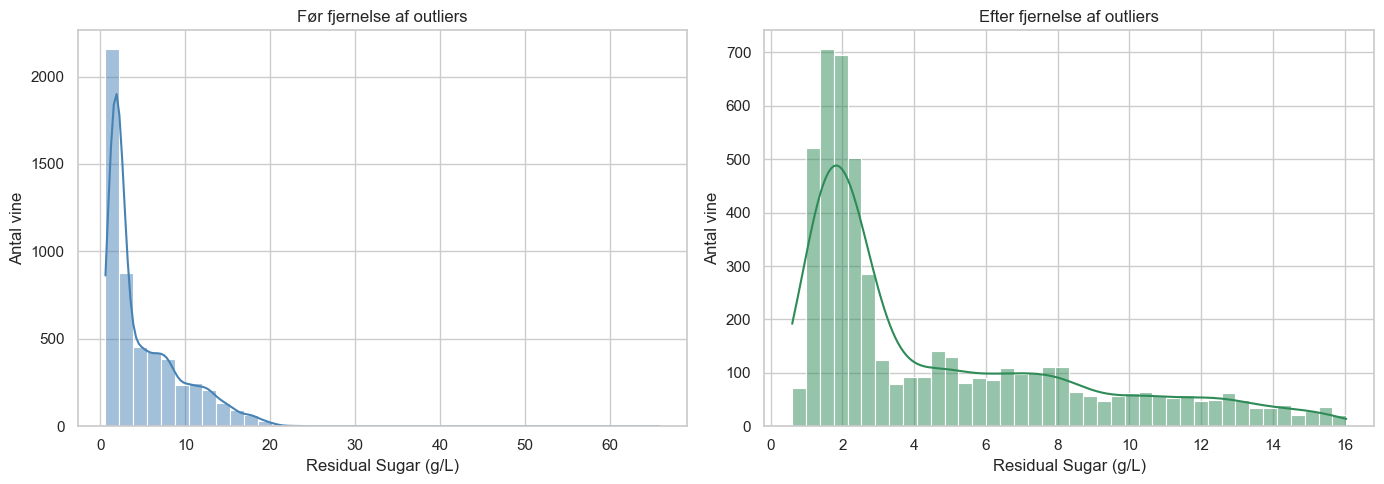

Antal outliers fjernet: 141
Rækker før: 5320, rækker efter: 5179


In [ ]:



# Beregn IQR
Q1 = wine_data['residual sugar'].quantile(0.25)
Q3 = wine_data['residual sugar'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificér outliers
outliers = wine_data[(wine_data['residual sugar'] < lower_bound) |
                     (wine_data['residual sugar'] > upper_bound)]

# Fjern outliers
cleaned_wine = wine_data[~wine_data.index.isin(outliers.index)]

# Visualiser med histogram før og efter
plt.figure(figsize=(14, 5))

# Før rensning
plt.subplot(1, 2, 1)
sns.histplot(wine_data['residual sugar'], bins=40, kde=True, color='steelblue')
plt.title("Før fjernelse af outliers")
plt.xlabel("Residual Sugar (g/L)")
plt.ylabel("Antal vine")

# Efter rensning
plt.subplot(1, 2, 2)
sns.histplot(cleaned_wine['residual sugar'], bins=40, kde=True, color='seagreen')
plt.title("Efter fjernelse af outliers")
plt.xlabel("Residual Sugar (g/L)")
plt.ylabel("Antal vine")

plt.tight_layout()
plt.show()

# Print hvor mange der blev fjernet
print(f"Antal outliers fjernet: {len(outliers)}")
print(f"Rækker før: {len(wine_data)}, rækker efter: {len(cleaned_wine)}")




For at sikre, at analysen ikke påvirkes af ekstreme værdier (outliers), undersøgte vi kolonnen **residual sugar** for afvigelser.

#### Metode:

Vi brugte **IQR-metoden** (interkvartilafstand) til at identificere outliers:
- Først blev Q1 (25%-percentilen) og Q3 (75%-percentilen) beregnet.
- Derefter blev outliers defineret som værdier uden for intervallet:
  **\[Q1 − 1.5 × IQR ; Q3 + 1.5 × IQR\]**

#### Resultat:

- I alt blev **141 outliers** identificeret og fjernet.
- Antal vinprøver blev reduceret fra **5320** til **5179**.


For at vise effekten af denne rensning har vi anvendt **histogrammer**:
- Før fjernelsen ses en tydelig skæv fordeling med en lang hale mod høj restsukker.
- Efter fjernelsen fremstår fordelingen mere symmetrisk og balanceret.

#### Konklusion:

- Fjernelse af outliers gør analysen mere robust og pålidelig.
- Det hjælper med at undgå, at ekstreme værdier forvrænger resultater i fx gennemsnit, korrelationer eller PCA.



## Opgave 12 – Undersøg og fjern redundante features

In [ ]:

# Vi beregner her korrelationsmatrix
corr_matrix = cleaned_wine.corr(numeric_only=True)

# Vi finder attributter med lav korrelation med 'quality' (< 0.05 i absolut værdi)
quality_corr = corr_matrix['quality'].drop('quality')
low_corr_features = quality_corr[quality_corr.abs() < 0.05].index.tolist()

# Vi finder par af attributter med høj indbyrdes korrelation (> 0.75)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = [
    (row, col) for row in upper_tri.index for col in upper_tri.columns
    if pd.notnull(upper_tri.loc[row, col]) and abs(upper_tri.loc[row, col]) > 0.75
]

# Fjern én variabel i hvert højt korreleret par
redundant_features = list(set([pair[1] for pair in high_corr_pairs]))

# Samlet liste over features der skal fjernes
features_to_remove = list(set(low_corr_features + redundant_features))

# Rens datasættet
reduced_wine = cleaned_wine.drop(columns=features_to_remove)

# Print resultater
print("Fjernet pga. lav korrelation med kvalitet:", low_corr_features)
print("Fjernet pga. høj indbyrdes korrelation:", redundant_features)
print("Endelige antal features før/efter:", cleaned_wine.shape[1], "→", reduced_wine.shape[1])


Fjernet pga. lav korrelation med kvalitet: ['residual sugar', 'total sulfur dioxide', 'pH', 'sulphates']
Fjernet pga. høj indbyrdes korrelation: []
Endelige antal features før/efter: 16 → 12



I denne opgave forenklede vi datasættet ved at fjerne attributter, der enten er:

1. **Irrelevante i forhold til vinens kvalitet** (lav korrelation)
2. **Stærkt korrelerede med andre attributter** (redundante)

#### Metode:

- Først blev korrelationen mellem hver egenskab og `quality` beregnet.
  - Attributter med absolut korrelation lavere end **0.05** blev betragtet som irrelevante og fjernet.
- Dernæst blev par af attributter med høj indbyrdes korrelation (**r > 0.75**) identificeret.
  - Der blev dog **ikke fundet nogen attributter**, som skulle fjernes pga. høj korrelation med andre.

#### Resultat:

- Fjernet pga. lav korrelation med kvalitet:
  - `residual sugar`
  - `total sulfur dioxide`
  - `pH`
  - `sulphates`

- Fjernet pga. høj indbyrdes korrelation:
  - *(ingen)*

- Antal attributter før: **13**  
- Antal attributter efter: **9**

#### Konklusion:

Ved at fjerne de attributter, som ikke bidrager væsentligt til vurderingen af vinens kvalitet, har vi gjort datasættet mere simpelt og fokuseret. Det forbedrer grundlaget for videre analyser som fx PCA, clustering eller maskinlæring.


## Opgave 13 – PCA: Principal Component Analysis

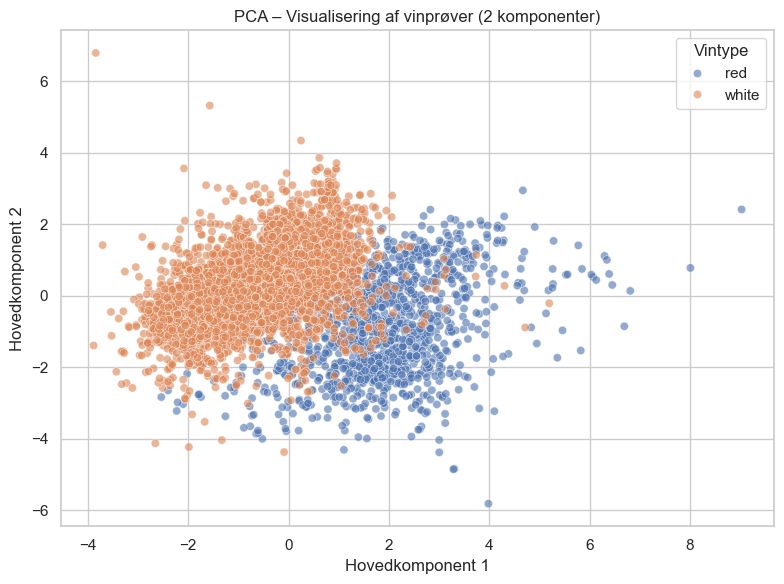

Forklaret varians pr. komponent: [0.34673078 0.22182825]


In [ ]:
# Her fjerner vi kolonner med intervaller/bins
reduced_wine = reduced_wine.drop(columns=[col for col in reduced_wine.columns if "bin" in col])

# Her fjerner vi 'wine_type' og 'quality' da de ikke indeholder numeriske data
features_for_pca = reduced_wine.drop(columns=['wine_type', 'quality'])

# Her fjerner vi kolonner med 0-varians (giver divide-by-zero warning ved skalering)
features_for_pca = features_for_pca.loc[:, features_for_pca.std() > 0]

# Her standardiserer vi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_for_pca)

# Her konverterer vi til DataFrame og håndtér NaN/inf
scaled_df = pd.DataFrame(scaled_data, columns=features_for_pca.columns)
scaled_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Her fjerner vi kolonner hvor ALLE værdier er NaN
scaled_df.dropna(axis=1, how='all', inplace=True)

# Her fjerner vi rækker med for mange manglende værdier (>50%)
threshold = scaled_df.shape[1] // 2
scaled_df = scaled_df[scaled_df.isnull().sum(axis=1) < threshold]

# Her erstatter vi resterende NaN med kolonnens middelværdi
scaled_df = scaled_df.fillna(scaled_df.mean())

# Her nulstiller vi index i både scaled_df og reduced_wine for at undgå KeyError
scaled_df = scaled_df.reset_index(drop=True)
reduced_wine = reduced_wine.reset_index(drop=True)

# Her trimmer vi reduced_wine til samme længde som scaled_df
reduced_wine_cleaned = reduced_wine.loc[:len(scaled_df)-1].copy()

# PCA: Reducer til 2 komponenter
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

# Her tilføjer vi PCA-komponenter til datasættet
reduced_wine_cleaned['PCA1'] = pca_components[:, 0]
reduced_wine_cleaned['PCA2'] = pca_components[:, 1]

# Her gemmer vi datasættet med PCA til fil
reduced_wine_cleaned.to_csv("wine_with_pca.csv", index=False)

# Her visualiserer vi PCA-resultatet
plt.figure(figsize=(8, 6))
sns.scatterplot(data=reduced_wine_cleaned, x='PCA1', y='PCA2', hue='wine_type', alpha=0.6)
plt.title("PCA – Visualisering af vinprøver (2 komponenter)")
plt.xlabel("Hovedkomponent 1")
plt.ylabel("Hovedkomponent 2")
plt.legend(title='Vintype')
plt.tight_layout()
plt.show()

# Her udskriver vi forklaret varians
print("Forklaret varians pr. komponent:", pca.explained_variance_ratio_)










I denne opgave har vi anvendt PCA til at reducere antallet af variabler og skabe et overblik over datastrukturen i vores rensede vin-datasæt.

#### Metode:

- Vi fjernede kolonner med interval-binning samt ikke-numeriske og lav-information kolonner (f.eks. med 0-varians).
- Data blev standardiseret, så alle variabler har gennemsnit 0 og standardafvigelse 1.
- Manglende værdier (`NaN` og `inf`) blev håndteret ved at fjerne ubrugelige rækker/kolonner og udfylde resten med middelværdier.
- Vi anvendte PCA til at reducere datasættet til 2 komponenter, som forklarer størstedelen af variationen.
- De to PCA-komponenter (`PCA1` og `PCA2`) blev tilføjet til datasættet og visualiseret i et 2D-plot.
- Det endelige datasæt med PCA-komponenter blev eksporteret som `.csv` til videre analyse.

#### Resultat:

- Visualiseringen viser en tydelig, men ikke perfekt, adskillelse mellem rød og hvid vin.
- Nogle vinprøver ligger tæt eller overlapper, hvilket kan skyldes delte kemiske egenskaber eller måleusikkerhed.
- De to PCA-komponenter forklarede tilsammen ca. 57 % af variationen i datasættet.

#### Konklusion:

PCA har reduceret kompleksiteten i datasættet og gjort det lettere at identificere mønstre og grupperinger visuelt.  
Det skaber et solidt udgangspunkt for efterfølgende opgaver som klyngeanalyse eller maskinlæring.



## Opgave 14 – Vis 10 tilfældige rækker fra det endelige datasæt

In [ ]:


# Vi udskriver 10 tilfældige rækker fra det endelige datasæt som proof of concept
reduced_wine.sample(n=10, random_state=42)


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,alcohol,quality,wine_type,wine_type_encoded
584,9.3,0.410,0.39,0.064,12.0,0.99840,10.2,5,red,NaN
1215,6.1,0.400,0.16,0.069,11.0,0.99550,10.1,7,red,NaN
877,7.3,0.550,0.01,0.093,9.0,0.99514,11.0,7,red,NaN
4230,6.8,0.520,0.26,0.038,27.0,0.99000,13.0,7,white,NaN
4159,5.8,0.140,0.15,0.042,27.0,0.99362,9.9,6,white,NaN
4545,6.9,0.300,0.45,0.039,36.0,0.99059,11.1,7,white,NaN
2787,6.1,0.255,0.44,0.045,53.0,0.99670,9.5,6,white,NaN
1744,6.2,0.180,0.38,0.028,36.0,0.99300,9.7,6,white,NaN
4481,7.2,0.400,0.24,0.055,45.0,0.99626,9.2,5,white,NaN
3801,6.2,0.360,0.38,0.031,20.0,0.98956,12.0,7,white,NaN




Som et proof of concept viser vi her 10 tilfældige rækker fra vores rensede og reducerede datasæt (`reduced_wine`).

